Author: Toby Balfre

Initial exploration of insight csv files to demonstrate ideas and possible insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# set data pathway
data_folder = '/Users/tobybalfre/Documents/Capgemini/Accounts/Rugby 7s/Rugby Data/_10_data_views'

# set match data filename
match_filename = 'match_fixtures_full_row_per_match.csv'

In [3]:
# load insight csvs
match = pd.read_csv(data_folder + '/' + match_filename)

### Match Data Analysis

Uses Match_fixtures data with a row per match
900 matches in dataset.

In [4]:
match.head(10)

,index,attendance,city,eventname,gmtdifference,pool,kickoff,matchid,matchnumber,stadium,...,weight_mean_team2,weight_max_team2,weight_min_team2,age_mean_team2,age_max_team2,age_min_team2,player_count_team2,timezone_team_1,timezone_team_2,winner
0,187,NaN,Las Vegas,2015/16 HSBC World Rugby Sevens Series - Las V...,-8.0,B,2016-03-04T18:30:00,23159,8,Sam Boyd Stadium,...,91.250000,105.0,77,27,34,23,12,GMT +0,GMT +9,0
1,51,NaN,Cape Town,2015/16 HSBC World Rugby Sevens Series - Cape ...,2.0,B,2015-12-12T12:27:00,22899,7,Cape Town Stadium,...,90.583333,102.0,82,26,31,23,12,GMT +0,GMT +3,0
2,546,NaN,Wellington,HSBC World Rugby Sevens Series 2016-17- Wellin...,13.0,C,2017-01-28T13:18:00,24188,7,Westpac Stadium,...,89.833333,102.0,71,27,37,19,12,GMT -8,GMT +2,0
3,859,NaN,London,HSBC World Rugby Sevens Series 2016-17- London,1.0,A,2017-05-20T10:58:00,24907,5,Twickenham,...,92.750000,100.0,80,24,31,21,12,GMT -8,GMT +0,2
4,407,NaN,London,2015/16 HSBC World Rugby Sevens Series - London,1.0,A,2016-05-21T10:14:00,23608,3,Twickenham,...,92.500000,105.0,75,28,32,23,12,GMT +14,GMT -8,2
5,158,NaN,Sydney,2015/16 HSBC World Rugby Sevens Series - Sydney,10.0,A,2016-02-06T21:03:00,23111,24,Allianz Stadium,...,89.583333,101.0,82,26,34,20,12,GMT +13,GMT +11,0
6,833,NaN,Paris,HSBC World Rugby Sevens Series 2016-17- Paris,2.0,C,2017-05-13T19:26:00,24812,24,Stade Jean Bouin,...,90.538462,105.0,70,25,34,22,13,GMT +0,GMT +3,0
7,292,NaN,Hong Kong,2015/16 HSBC World Rugby Sevens Series - Hong ...,8.0,B,2016-04-09T17:32:00,23321,23,Hong Kong Stadium,...,87.833333,110.0,74,28,35,22,12,GMT +0,GMT +3,0
8,426,NaN,London,2015/16 HSBC World Rugby Sevens Series - London,1.0,D,2016-05-21T17:32:00,23627,22,Twickenham,...,96.416667,108.0,90,26,32,20,12,GMT -3,GMT +13,0
9,696,NaN,Vancouver,HSBC World Rugby Sevens Series 2016-17- Vancouver,-8.0,A,2017-03-11T18:36:00,24535,22,BC Place,...,92.461538,105.0,85,26,33,20,13,GMT +2,GMT +0,0


In [5]:
match.columns

Index(['index', 'attendance', 'city', 'eventname', 'gmtdifference', 'pool',
       'kickoff', 'matchid', 'matchnumber', 'stadium', 'stage', 'status',
       'team1id', 'team1name', 'team1score', 'team2id', 'team2name',
       'team2score', 'tournament_id', 'index_team1', 'team_id_team1',
       'height_mean_team1', 'height_max_team1', 'height_min_team1',
       'weight_mean_team1', 'weight_max_team1', 'weight_min_team1',
       'age_mean_team1', 'age_max_team1', 'age_min_team1',
       'player_count_team1', 'index_team2', 'team_id_team2',
       'height_mean_team2', 'height_max_team2', 'height_min_team2',
       'weight_mean_team2', 'weight_max_team2', 'weight_min_team2',
       'age_mean_team2', 'age_max_team2', 'age_min_team2',
       'player_count_team2', 'timezone_team_1', 'timezone_team_2', 'winner'],
      dtype='object')

In [6]:
match.describe()

,index,attendance,gmtdifference,matchid,matchnumber,team1id,team1score,team2id,team2score,tournament_id,...,height_max_team2,height_min_team2,weight_mean_team2,weight_max_team2,weight_min_team2,age_mean_team2,age_max_team2,age_min_team2,player_count_team2,winner
count,900.000000,0.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,NaN,3.296667,23857.302222,23.000000,2571.050000,22.241111,2829.073333,14.220000,1652.000000,...,191.903333,171.634444,90.471108,104.318743,77.212222,26.003333,32.337778,21.376667,12.242222,1.305556
std,259.951919,NaN,6.673190,686.349407,12.994394,456.833451,11.307448,666.411242,8.903165,36.633197,...,2.734160,5.335124,3.419718,5.636267,4.927558,1.455682,2.320129,1.486801,0.441450,0.506874
min,0.000000,NaN,-8.000000,22808.000000,1.000000,2408.000000,0.000000,2408.000000,0.000000,1611.000000,...,185.000000,155.000000,80.500000,88.000000,65.000000,23.000000,26.000000,19.000000,11.000000,0.000000
25%,224.750000,NaN,1.000000,23237.250000,12.000000,2412.000000,14.000000,2413.000000,7.000000,1615.750000,...,190.000000,169.000000,88.166667,102.000000,74.000000,25.000000,31.000000,20.000000,12.000000,1.000000
50%,449.500000,NaN,3.000000,23841.000000,23.000000,2416.000000,21.000000,2419.000000,14.000000,1652.000000,...,192.000000,172.000000,90.519231,104.000000,76.000000,26.000000,33.000000,21.000000,12.000000,1.000000
75%,674.250000,NaN,8.000000,24470.500000,34.000000,2420.000000,29.000000,3887.000000,20.000000,1688.250000,...,195.000000,175.000000,92.750000,106.000000,81.000000,27.000000,34.000000,22.000000,12.000000,2.000000
max,899.000000,NaN,13.000000,24947.000000,45.000000,3921.000000,63.000000,3924.000000,45.000000,1693.000000,...,198.000000,186.000000,97.307692,120.000000,90.000000,30.000000,37.000000,27.000000,13.000000,2.000000


In [7]:
# check how many matches are in the dataset per team. use index column for counts.
match.groupby(['team1id']).count()

,index,attendance,city,eventname,gmtdifference,pool,kickoff,matchid,matchnumber,stadium,...,weight_mean_team2,weight_max_team2,weight_min_team2,age_mean_team2,age_max_team2,age_min_team2,player_count_team2,timezone_team_1,timezone_team_2,winner
team1id,,,,,,,,,,,,,,,,,,,,,
2408,62,0,62,62,62,36,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2409,71,0,71,71,71,45,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
2410,42,0,42,42,42,18,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
2412,73,0,73,73,73,43,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
2413,92,0,92,92,92,55,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
2414,48,0,48,48,48,25,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
2415,57,0,57,57,57,28,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
2416,84,0,84,84,84,51,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
2418,43,0,43,43,43,22,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


### Compare Score Difference To Time Zones

In [8]:
# create score difference feature where team1 is first time (ie a positive score diff means Team1 won).
match['score_diff'] = match['team1score'] - match['team2score']
# extract out numerical timezone relative to GMT from string and convert to integer. use whitespace after GMT to 
# split the numberical digits.
match['team1_GMT_diff'] = match['timezone_team_1'].str.split(' ').str.get(1).astype(int)
match['team2_GMT_diff'] = match['timezone_team_2'].str.split(' ').str.get(1).astype(int)
# create hours in timezone difference between teams
match['team_timezone_diff'] = match['team1_GMT_diff'] - match['team2_GMT_diff']
# now compare timezone of each team to the tournament timezone. do as modulus as only interested in the absolute difference
# (or are we?). Also should double check how tournament gmtdifference has been worked out to ensure the below makes sense
match['tourn_team1_time_diff'] = match['gmtdifference'] - match['team1_GMT_diff']
match['tourn_team2_time_diff'] = match['gmtdifference'] - match['team2_GMT_diff']

In [9]:
match['tourn_team1_time_diff'].describe()

count    900.000000
mean      -0.524444
std        9.673333
min      -22.000000
25%       -9.000000
50%        0.000000
75%        8.000000
max       21.000000
Name: tourn_team1_time_diff, dtype: float64

In [10]:
match['tourn_team2_time_diff'].describe()

count    900.000000
mean       0.273333
std        8.758073
min      -22.000000
25%       -5.250000
50%        1.000000
75%        7.000000
max       21.000000
Name: tourn_team2_time_diff, dtype: float64

In [11]:
# compare timezone difference for each team and their scores.
# checking winner feature values. looks like 0 is a draw, 1 is team 1 win, 2 is team 2 win.
cols = ['team1score', 'team2score', 'winner']
match[cols].groupby(['winner']).count()

,team1score,team2score
winner,,
0,20,20
1,585,585
2,295,295


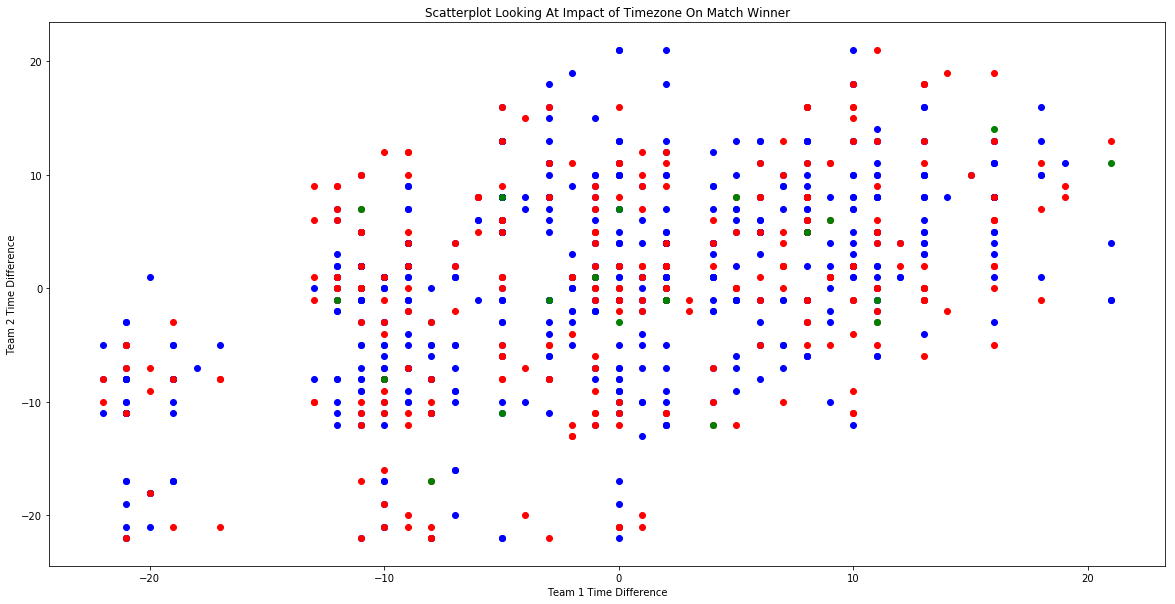

In [12]:
# now create scatterplot where winner feature is a colour groupby setting
cols = ['tourn_team1_time_diff', 'tourn_team2_time_diff']
team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['tourn_team1_time_diff'], team1_wins['tourn_team2_time_diff'],c = 'b')
plt.scatter(team2_wins['tourn_team1_time_diff'], team2_wins['tourn_team2_time_diff'],c = 'r')
plt.scatter(draws['tourn_team1_time_diff'], draws['tourn_team2_time_diff'],c = 'g')
plt.title('Scatterplot Looking At Impact of Timezone On Match Winner')
plt.xlabel('Team 1 Time Difference')
plt.ylabel('Team 2 Time Difference')
plt.show()

In [13]:
# look at modulus of time zone difference (ie the direction of timezone may be irrelevant and it is the total 
# hours difference that matters.)
match['tourn_team1_time_diff_abs'] = abs(match['gmtdifference'] - match['team1_GMT_diff'])
match['tourn_team2_time_diff_abs'] = abs(match['gmtdifference'] - match['team2_GMT_diff'])

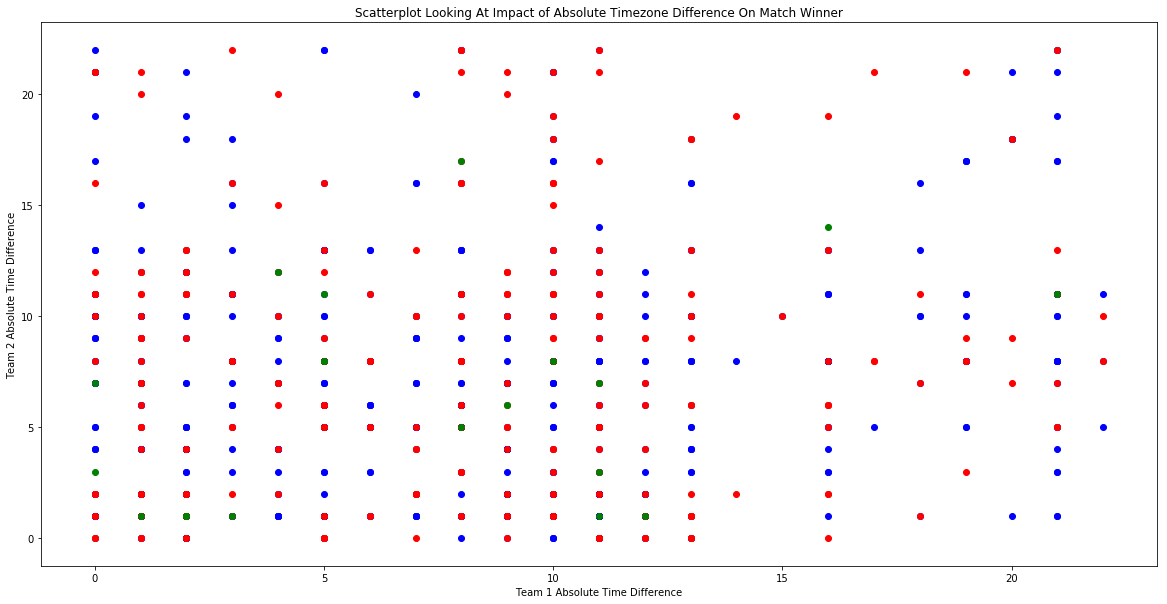

In [14]:
# now create scatterplot where winner feature is a colour groupby setting
cols = ['tourn_team1_time_diff_abs', 'tourn_team2_time_diff_abs']
team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['tourn_team1_time_diff_abs'], team1_wins['tourn_team2_time_diff_abs'],c = 'b')
plt.scatter(team2_wins['tourn_team1_time_diff_abs'], team2_wins['tourn_team2_time_diff_abs'],c = 'r')
plt.scatter(draws['tourn_team1_time_diff_abs'], draws['tourn_team2_time_diff_abs'],c = 'g')
plt.title('Scatterplot Looking At Impact of Absolute Timezone Difference On Match Winner')
plt.xlabel('Team 1 Absolute Time Difference')
plt.ylabel('Team 2 Absolute Time Difference')
plt.show()

Observation - relative timezone difference on home base to tournament does not seem to have any significant impact
on match outcome.

### Mean Player Height and Weight Analysis on Match Outcome 

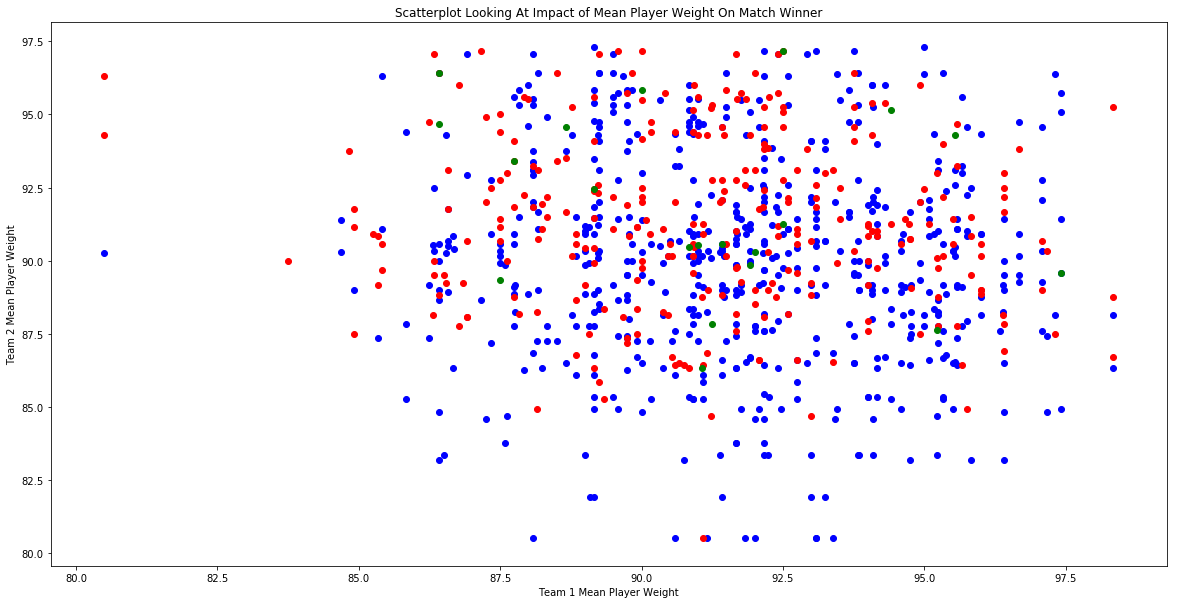

In [15]:
# looking at mean player stats per match and their impact on match outcome using correlation plots.
cols = ['weight_mean_team1', 'weight_mean_team2']

team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['weight_mean_team1'], team1_wins['weight_mean_team2'],c = 'b')
plt.scatter(team2_wins['weight_mean_team1'], team2_wins['weight_mean_team2'],c = 'r')
plt.scatter(draws['weight_mean_team1'], draws['weight_mean_team2'],c = 'g')
plt.title('Scatterplot Looking At Impact of Mean Player Weight On Match Winner')
plt.xlabel('Team 1 Mean Player Weight')
plt.ylabel('Team 2 Mean Player Weight')
plt.show()

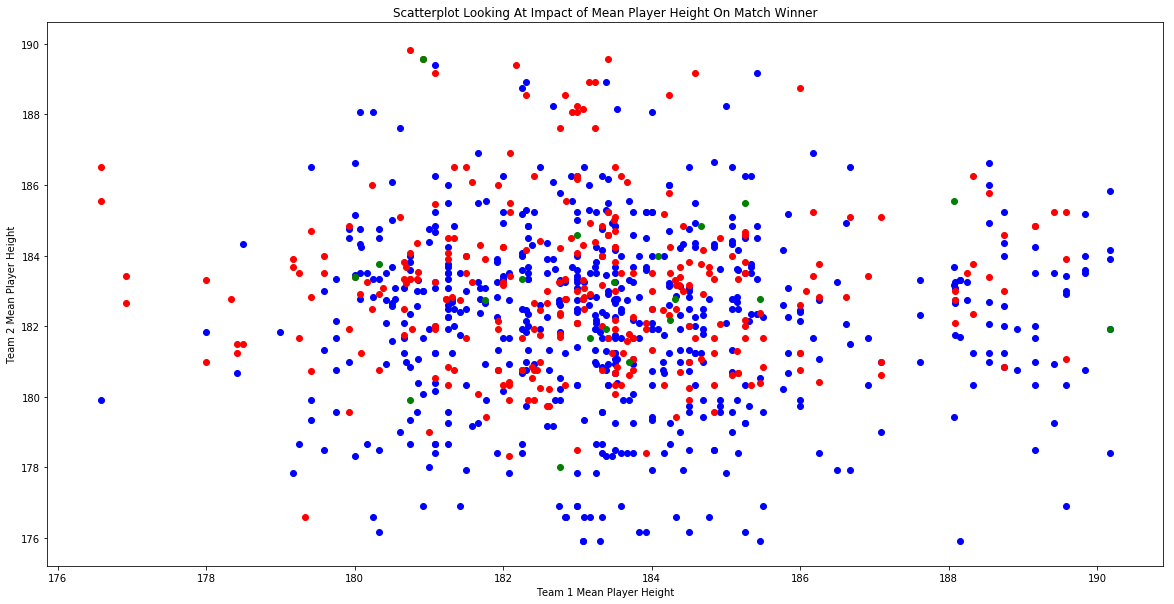

In [16]:
# mean player height
cols = ['height_mean_team1', 'height_mean_team2']

team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['height_mean_team1'], team1_wins['height_mean_team2'],c = 'b')
plt.scatter(team2_wins['height_mean_team1'], team2_wins['height_mean_team2'],c = 'r')
plt.scatter(draws['height_mean_team1'], draws['height_mean_team2'],c = 'g')
plt.title('Scatterplot Looking At Impact of Mean Player Height On Match Winner')
plt.xlabel('Team 1 Mean Player Height')
plt.ylabel('Team 2 Mean Player Height')
plt.show()

### Player Age Analysis

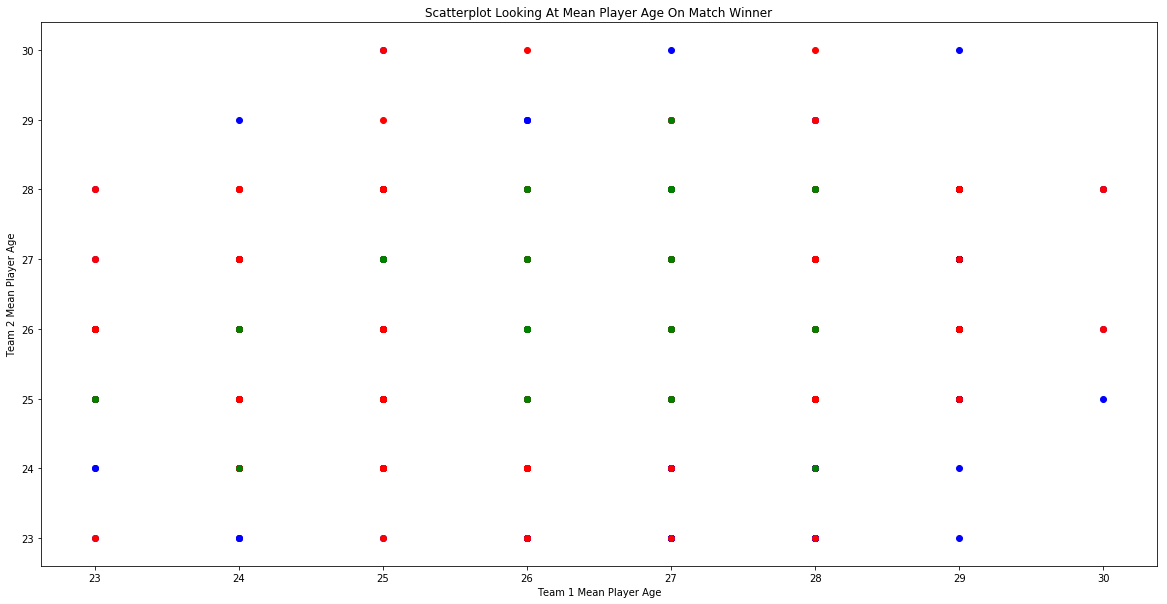

In [17]:
# looking at number of players impact on match outcome.
cols = ['age_mean_team1', 'age_mean_team2']

team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['age_mean_team1'], team1_wins['age_mean_team2'],c = 'b')
plt.scatter(team2_wins['age_mean_team1'], team2_wins['age_mean_team2'],c = 'r')
plt.scatter(draws['age_mean_team1'], draws['age_mean_team2'],c = 'g')
plt.title('Scatterplot Looking At Mean Player Age On Match Winner')
plt.xlabel('Team 1 Mean Player Age')
plt.ylabel('Team 2 Mean Player Age')
plt.show()

Observation - because the player ages are integers the scatterplot above cannot be used because it is likely that 
several dots are 'underneath' the final one drawn and therefore shown on the scatterplot.

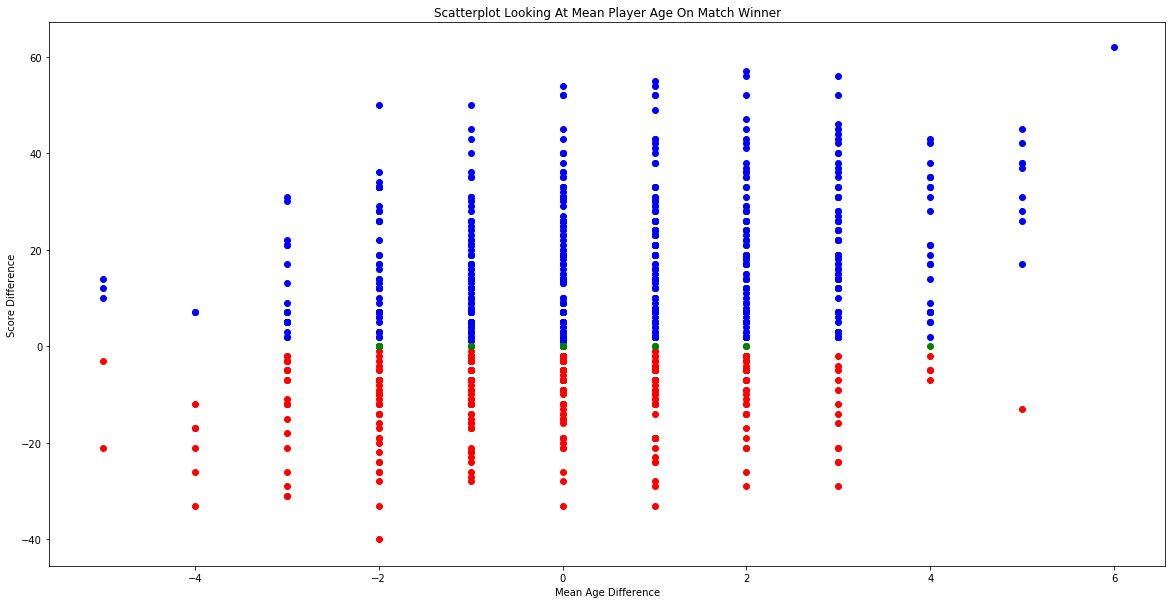

In [18]:
# Look at mean player age relative difference versus score scatterplot to see if that it more useful.
match['mean_age_diff'] = match['age_mean_team1'] - match['age_mean_team2']

cols = ['mean_age_diff', 'score_diff']

team1_wins = match[cols][match['winner']==1]
team2_wins = match[cols][match['winner']==2]
draws = match[cols][match['winner']==0]
#plot team 1 wins with different symbol to team 2 etc.
plt.figure(figsize=(20,10))
plt.scatter(team1_wins['mean_age_diff'], team1_wins['score_diff'],c = 'b')
plt.scatter(team2_wins['mean_age_diff'], team2_wins['score_diff'],c = 'r')
plt.scatter(draws['mean_age_diff'], draws['score_diff'],c = 'g')
plt.title('Scatterplot Looking At Mean Player Age On Match Winner')
plt.xlabel('Mean Age Difference')
plt.ylabel('Score Difference')
plt.show()

### Look At Strength of Correlation Of Features With Score Difference 

In [19]:
match[cols].corr()

,mean_age_diff,score_diff
mean_age_diff,1.000000,0.261322
score_diff,0.261322,1.000000


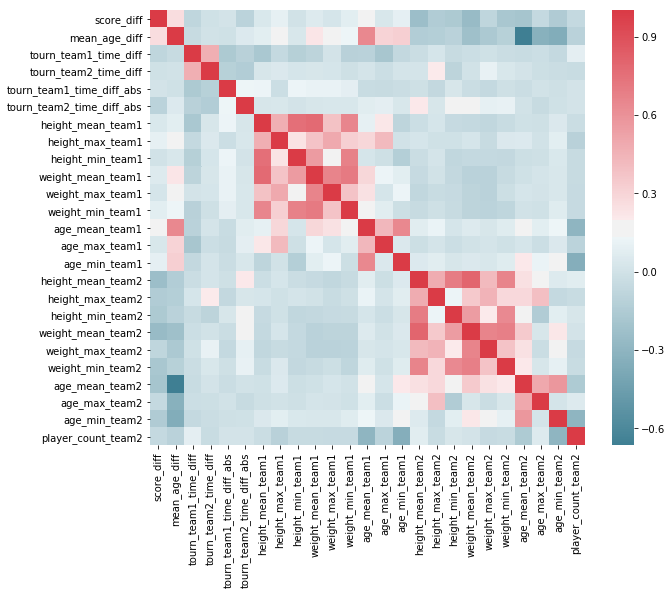

In [20]:
# Age seems to have a significant impact. Lets look at strength of correlation.
cols = ['score_diff', 'mean_age_diff', 'tourn_team1_time_diff', 'tourn_team2_time_diff',
       'tourn_team1_time_diff_abs', 'tourn_team2_time_diff_abs', 'height_mean_team1', 'height_max_team1', 'height_min_team1',
       'weight_mean_team1', 'weight_max_team1', 'weight_min_team1',
       'age_mean_team1', 'age_max_team1', 'age_min_team1', 'height_mean_team2', 'height_max_team2', 'height_min_team2',
       'weight_mean_team2', 'weight_max_team2', 'weight_min_team2',
       'age_mean_team2', 'age_max_team2', 'age_min_team2', 'player_count_team2']

f, ax = plt.subplots(figsize=(10, 8))
corr = match[cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
# get p values to see which correlations are statistically significant

# check score difference to mean age difference
pearsonr(match['score_diff'], match['mean_age_diff'])

(0.26132155066200696, 1.6178306733043876e-15)

In [22]:
# height_mean_team1
pearsonr(match['score_diff'], match['height_mean_team1'])

(0.042543193393342324, 0.20227407894019633)

In [23]:
# score difference and height_mean_team2
pearsonr(match['score_diff'], match['height_mean_team2'])

(-0.24040151734782547, 2.6818060284922924e-13)

Observation - the mean height of the opposing team is significant in reducing the score difference. 
However, a greater mean height does increase the score difference. this suggests that weight is a defensive
benefit and can help reduce the score of the opposing team but it does not typicaslly help increase your score.

In [24]:
#weight_mean_team2
pearsonr(match['score_diff'], match['weight_mean_team2'])

(-0.25504344969515419, 7.8788884345392634e-15)

### Tournament Ranking Analysis

In [25]:
# collapse dataset into a row per team per tournament
# look at distribution of wins and whether it is affected by height, weight etc.
# collapse by team 1 id to get their wins, losses, draws, then again by team 2 id to get theirs, then join.
#pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
match_pivot_team1 = match.pivot_table(values = 'mean_age_diff', index=['team1id', 'tournament_id'], 
                       columns = ['winner'], aggfunc=[np.mean])

match_pivot_team2 = match.pivot_table(values = 'mean_age_diff', index=['team2id', 'tournament_id'], 
                       columns = ['winner'], aggfunc='count')

match_pivot_team1

mean                    
winner                   0         1         2
team1id tournament_id                         
2408    1611           NaN -4.000000 -3.000000
        1612           NaN -2.000000       NaN
        1613           NaN -1.500000 -3.000000
        1614           NaN -1.000000       NaN
        1615           NaN -1.000000       NaN
        1616           NaN -2.000000 -3.000000
        1617           NaN -0.666667       NaN
        1618          -2.0  1.000000 -1.000000
        1619           NaN -0.500000 -1.333333
        1620           0.0 -0.333333  0.000000
        1684           NaN -0.500000 -0.500000
        1685           NaN -1.000000 -3.000000
        1686           NaN -1.500000       NaN
        1687           NaN -3.000000 -3.500000
        1688          -2.0 -1.000000 -3.000000
        1689           NaN -1.000000 -0.500000
        1690           NaN -0.666667  0.000000
        1691           NaN -1.000000 -1.000000
        1692           NaN  1.000000       NaN
        1693           NaN -3.000000 -1.000000
2409    1611           NaN  1.333333 -1.000000
        1612           NaN  1.500000 -2.000000
        1613           NaN  0.000000 -1.000000
        1614           NaN  0.000000       NaN
        1615           NaN -0.750000       NaN
        1616           NaN -0.666667 -2.000000
        1617           NaN  2.000000  0.000000
        1618           NaN -0.500000  1.000000
        1619           NaN  2.000000       NaN
        1620           NaN  2.000000  1.000000
...                    ...       ...       ...
3911    1685           NaN       NaN -2.000000
        1686           NaN  1.000000  1.000000
        1687           NaN  1.000000       NaN
        1688           NaN       NaN -1.000000
        1689           NaN       NaN  1.000000
        1690           NaN  3.000000  1.000000
        1691           NaN  0.000000 -1.000000
        1692           NaN  2.000000  1.000000
        1693           NaN       NaN  2.000000
3913    1693           NaN       NaN -2.000000
3921    1611           NaN -1.000000 -1.000000
        1612           NaN  1.500000       NaN
        1613           NaN -3.000000 -1.000000
        1614           NaN -1.000000 -2.000000
        1615           NaN  0.500000       NaN
        1616           NaN -1.000000       NaN
        1617           NaN -0.500000 -1.000000
        1618           NaN  2.000000 -0.333333
        1619           NaN       NaN -1.000000
        1620           NaN -3.000000       NaN
        1684           NaN -1.000000 -3.000000
        1685           NaN -1.500000 -4.000000
        1686           NaN -1.000000 -0.500000
        1687          -2.0       NaN  0.000000
        1688           NaN -1.000000 -2.000000
        1689           NaN -2.000000       NaN
        1690           NaN -2.000000 -2.000000
        1691           NaN -3.000000       NaN
        1692           NaN -1.000000       NaN
        1693           NaN -1.000000 -1.000000

[293 rows x 3 columns]

### Score Difference Analysis 

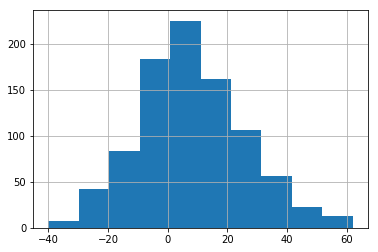

In [26]:
# consider the distribution of score differences.
match['score_diff'].hist()

Observation - 
Over such a large number of matches it is surprising to find the mean score difference to be significantly different to zero. The positive skew of the histogram shows that the first team in the match order (ie Team 1) is more likely to win than the second in the order (ie team 2 in a match) by on average 8 points. Is this just chance or is there something in the process by which team 1 and 2 in a match are selected which gives rise to this pattern?

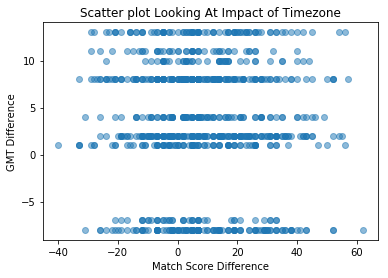

In [27]:
# compare the score difference to the relative difference to GMT
plt.scatter(match['score_diff'], match['gmtdifference'], alpha=0.5)
plt.title('Scatter plot Looking At Impact of Timezone')
plt.xlabel('Match Score Difference')
plt.ylabel('GMT Difference')
plt.show()

In [55]:
# find team ids
cols = ['team1id', 'team1name']
lookup = match[cols]
lookup[lookup['team1id'].isin([2423,3886,3910, 3911])].drop_duplicates() 

,team1id,team1name
133,3911,Russia 7s
221,3910,Portugal 7s
222,2423,Japan 7s
752,3886,Brazil 7s
